In [3]:
import pandas as pd

# # Load dataset
# df = pd.read_csv("/Users/adityasingh/Desktop/DESKTOP/Reranked-Reasoned-Retrieval-Augmented-Financial-Fraud-Detection_Retard/aniruddha_experiments/credit-card-expriments/ieee-train-merged_imputed_cleaned_dropped_stuff.csv")

# # Drop completely useless columns
# # df.drop(columns=['Unnamed: 0', 'TransactionID'], inplace=True)

# # Sort dataset by time
# df = df.sort_values(by="TransactionDT").reset_index(drop=True)


In [3]:
# Create time-based features
df['TimeInDay'] = df.TransactionDT % 86400
df['Cents'] = df.TransactionAmt % 1


In [4]:
df = pd.get_dummies(df, columns=['ProductCD', 'card4', 'card6', 'P_emaildomain'], drop_first=True)


In [4]:
# # Define split ratios
# train_size = 0.65
# valid_size = 0.15
# test_size = 0.20

# # Compute split indices
# train_index = int(len(df) * train_size)
# valid_index = int(len(df) * (train_size + valid_size))

# # Split the dataset
# df_train = df.iloc[:train_index]
# df_valid = df.iloc[train_index:valid_index]
# df_test = df.iloc[valid_index:]

# # Define features and target
# X_train, y_train = df_train.drop(columns=['isFraud']), df_train['isFraud']
# X_valid, y_valid = df_valid.drop(columns=['isFraud']), df_valid['isFraud']
# X_test, y_test = df_test.drop(columns=['isFraud']), df_test['isFraud']

X_train = pd.read_csv("/Users/adityasingh/Desktop/DESKTOP/Reranked-Reasoned-Retrieval-Augmented-Financial-Fraud-Detection_Retard/IEEE-CIS/IEEE-CIS-CORRECTED/train_df.csv")
y_train = pd.read_csv("/Users/adityasingh/Desktop/DESKTOP/Reranked-Reasoned-Retrieval-Augmented-Financial-Fraud-Detection_Retard/IEEE-CIS/IEEE-CIS-CORRECTED/train_y_df.csv")
X_test = pd.read_csv("/Users/adityasingh/Desktop/DESKTOP/Reranked-Reasoned-Retrieval-Augmented-Financial-Fraud-Detection_Retard/IEEE-CIS/IEEE-CIS-CORRECTED/test_df.csv")
y_test = pd.read_csv("/Users/adityasingh/Desktop/DESKTOP/Reranked-Reasoned-Retrieval-Augmented-Financial-Fraud-Detection_Retard/IEEE-CIS/IEEE-CIS-CORRECTED/test_y_df.csv")
X_valid = pd.read_csv("/Users/adityasingh/Desktop/DESKTOP/Reranked-Reasoned-Retrieval-Augmented-Financial-Fraud-Detection_Retard/IEEE-CIS/IEEE-CIS-CORRECTED/val_df.csv")
y_valid = pd.read_csv("/Users/adityasingh/Desktop/DESKTOP/Reranked-Reasoned-Retrieval-Augmented-Financial-Fraud-Detection_Retard/IEEE-CIS/IEEE-CIS-CORRECTED/val_y_df.csv")


In [16]:
y_train.shape


(76770, 1)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=15,  # Limit tree depth to avoid overfitting
    class_weight="balanced",  # Handle class imbalance
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)


/Users/adityasingh/Desktop/DESKTOP/Reranked-Reasoned-Retrieval-Augmented-Financial-Fraud-Detection_Retard/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

# Shap Calculation

In [9]:
import shap
import time
import numpy as np



/Users/adityasingh/Desktop/DESKTOP/Reranked-Reasoned-Retrieval-Augmented-Financial-Fraud-Detection_Retard/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import shap

# Create an explainer object
explainer = shap.Explainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)


Fixed SHAP values shape: (23622, 182)


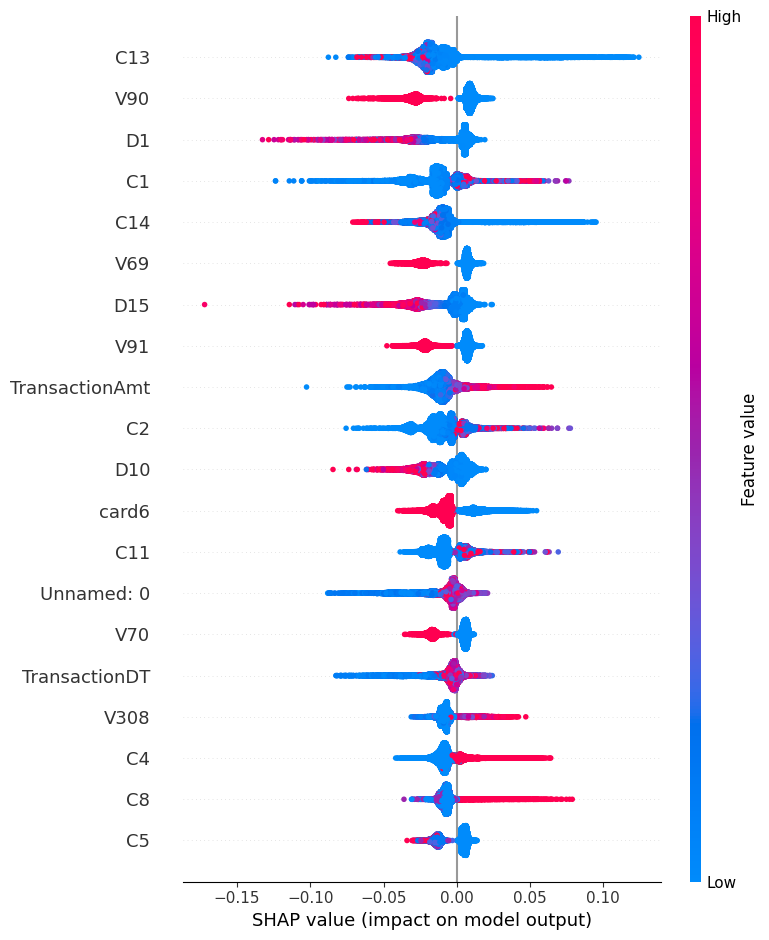

In [ ]:
shap_values_fixed = shap_values[:, :, 1]  # Select SHAP values for class 1

# Ensure correct shape
print(f"Fixed SHAP values shape: {shap_values_fixed.shape}")  # Should match (23622, 182)

# Generate SHAP summary plot
shap.summary_plot(shap_values_fixed, X_test)

In [ ]:
print(f"Shape of SHAP values: {shap_values_fixed.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of SHAP values: (23622, 182, 2)
Shape of X_test: (23622, 182)


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, average_precision_score

# Make predictions
y_valid_pred = rf_model.predict(X_valid)
y_test_pred = rf_model.predict(X_test)

# AUC Scores
valid_auc = roc_auc_score(y_valid, rf_model.predict_proba(X_valid)[:, 1])
test_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# AUCPR Scores
valid_aucpr = average_precision_score(y_valid, rf_model.predict_proba(X_valid)[:, 1])
test_aucpr = average_precision_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print results
print(f"Validation AUC: {valid_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Validation AUCPR: {valid_aucpr:.4f}")
print(f"Test AUCPR: {test_aucpr:.4f}")

# Classification Reports
print("Validation Classification Report:\n", classification_report(y_valid, y_valid_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Validation AUC: 0.8840
Test AUC: 0.8410
Validation AUCPR: 0.4825
Test AUCPR: 0.4068
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     85108
         1.0       0.32      0.59      0.41      3473

    accuracy                           0.93     88581
   macro avg       0.65      0.77      0.69     88581
weighted avg       0.96      0.93      0.94     88581

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96    114044
         1.0       0.25      0.52      0.34      4064

    accuracy                           0.93    118108
   macro avg       0.62      0.73      0.65    118108
weighted avg       0.96      0.93      0.94    118108

Confusion Matrix (Test Set):
[[107672   6372]
 [  1935   2129]]


In [8]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(class_weight="balanced", random_state=42), param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}


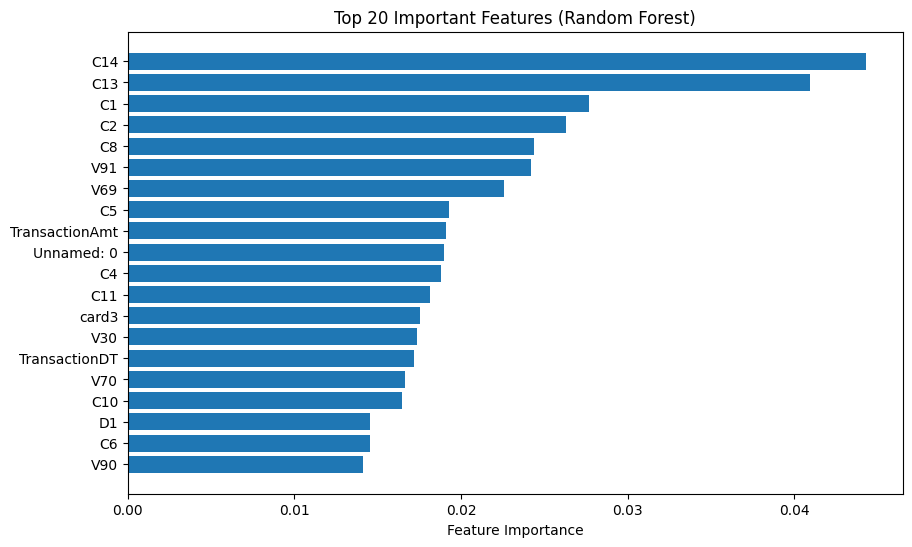

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = np.array(X_train.columns)

# Sort and plot
sorted_idx = np.argsort(importances)[::-1][:20]  # Top 20 features
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [9]:
import joblib

# Save model
joblib.dump(rf_model, "random_forest_fraud.pkl")

# Save feature names for later use
joblib.dump(X_train.columns, "feature_names.pkl")


['feature_names.pkl']